## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]).any()
duplicates = study_data_complete["Mouse ID"].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns={"Mouse ID": "Counts of Mouse ID"})
duplicates.head()


,Counts of Mouse ID
g989,13
k483,10
t724,10
q633,10
b879,10


In [4]:
# SET THE INDEX
study_data = study_data_complete.set_index("Mouse ID")
study_data.head()
#check the mouse data for ID
g989 = study_data.loc["g989",:]
g989

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.reset_index()
study_data = study_data.drop_duplicates()
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_volume = study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
#tumor_volume

mean_tumor_volume = tumor_volume.mean()
median_tumor_volume = tumor_volume.median()
var_tumor_volume = tumor_volume.var()
std_tumor_volume = tumor_volume.std()
sem_tumor_volume = tumor_volume.sem()
drug_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std.Dev": std_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
#tumor_volume

mean_tumor_volume = tumor_volume.mean()
median_tumor_volume = tumor_volume.median()
var_tumor_volume = tumor_volume.var()
std_tumor_volume = tumor_volume.std()
sem_tumor_volume = tumor_volume.sem()
drug_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std.Dev": std_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
drug_tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_df = study_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume = ("Tumor Volume (mm3)",np.mean),
    Median_Tumor_Volume = ("Tumor Volume (mm3)",np.median),
    Variance_Tumor_Volume = ("Tumor Volume (mm3)",np.var),
    Stdev_Tumor_Volume = ("Tumor Volume (mm3)",np.std),
    SEM_Tumor_Volume = ("Tumor Volume (mm3)",st.sem)
)
drug_tumor_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

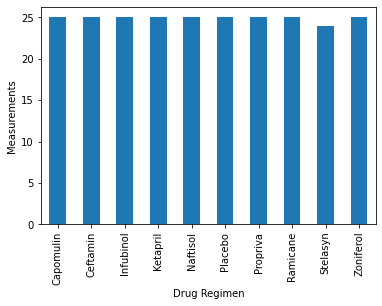

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



data = mouse_metadata.groupby('Drug Regimen')['Drug Regimen'].count()
final= data.plot(kind='bar')

final.set_xlabel("Drug Regimen")
final.set_ylabel("Measurements")

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

data1 = mouse_data = mouse_metadata.groupby('Drug Regimen')['Drug Regimen'].count()
data1
# count_chart = data1.plot(kind='bar')
# plt.xlabel('Drug Regimen')
# plt.ylabel('Measurements')

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Drug Regimen, dtype: int64

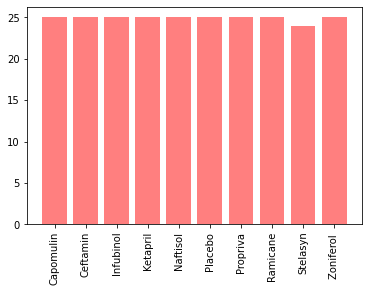

In [12]:
# Set x axis and tick locations
x_axis = np.arange(len(data1))
drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol "]
tick_locations = [value for value in x_axis]
plt.bar(x_axis, data1, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_list, rotation=90)
plt.show()

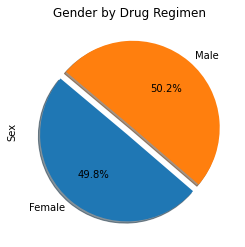

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data2 = mouse_metadata.groupby('Sex')['Sex'].count()
explode = (0.05,0.05)
#gender1 = data1['Drug Regimen'].count()
final = data2.plot(kind="pie", title = "Gender by Drug Regimen", explode=explode, startangle=140, shadow=True, autopct="%1.1f%%")
#plt.axis("equal")
# plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
maxTime = study_results.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index()
maxTime = maxTime.sort_values(by = 'Mouse ID')
maxTime.head()

,Mouse ID,Timepoint
159,a203,45
183,a251,45
184,a262,45
185,a275,45
80,a366,30


In [16]:
# pd.set_option('display.max_rows', None)
merge_df = pd.merge(study_data_complete, maxTime, on=("Mouse ID","Timepoint"), how ="right")
# merge_df_drug = merge_df.loc[merge_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
# merge_df_drug.set_index('Drug Regimen')
merge_df.set_index("Drug Regimen")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Infubinol,a203,45,67.973419,2,Female,20,23
Infubinol,a251,45,65.525743,1,Female,21,25
Placebo,a262,45,70.717621,4,Female,17,29
Ceftamin,a275,45,62.999356,3,Female,20,28
Stelasyn,a366,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...
Propriva,z435,10,48.710661,0,Female,12,26
Ramicane,z578,45,30.638696,0,Male,11,16
Infubinol,z581,45,62.754451,3,Female,24,25


In [17]:
#Put treatments into a list for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final = []
for row in treatment:
# Locate the rows which contain mice on each drug and get the tumor volumes
    merge_df_drug = merge_df.loc[merge_df['Drug Regimen'] == row]

#list all tumor values
    values = merge_df_drug['Tumor Volume (mm3)']
    
    final.append(values)
# final

    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{row}")
    print(f"‾‾‾‾‾‾‾‾‾")
    print(f"The lower quartile of tumor volume  is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")
    

Capomulin
‾‾‾‾‾‾‾‾‾
The lower quartile of tumor volume  is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
‾‾‾‾‾‾‾‾‾
The lower quartile of tumor volume  is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
‾‾‾‾‾‾‾‾‾
The lower quartile of tumor volume  is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Cef

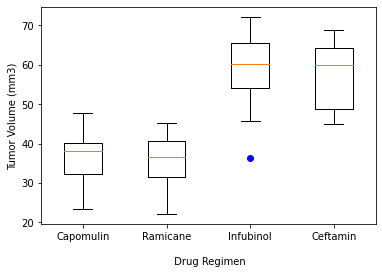

In [18]:
# Plot tumor values
plt.boxplot(final, sym ='b')
plt.xticks([1, 2, 3, 4], treatment)
# plt.xticks(["a", "b", "c", "d"])
plt.xlabel('\n Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin result for mouse s185')

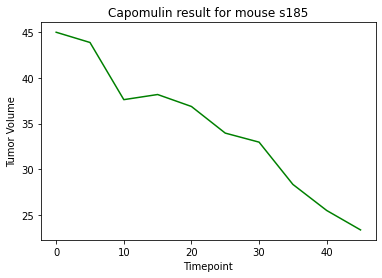

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
merge_df_line = study_results.loc[study_results['Mouse ID'] == "s185"]
merge_df_line.set_index('Mouse ID')

#final= data.plot(kind='bar')

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.plot(merge_df_line['Timepoint'], merge_df_line['Tumor Volume (mm3)'], color="green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin result for mouse s185")

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
